In [ ]:
# Author: Kajal Churi
# Project: Music Signal Analysis using Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Loading and Visualising the Audio Signal

In [2]:
sample_rate, audio = wavfile.read("/Users/kajalchuri/Downloads/IndustrialDrumLoop.wav")

In [3]:
audio = audio / np.max(np.abs(audio))

In [4]:
duration = len(audio) / sample_rate
time = np.linspace(0, duration, len(audio))

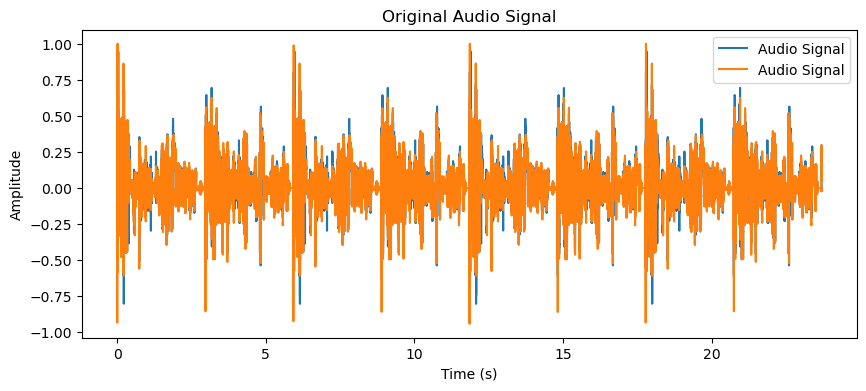

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(time, audio, label="Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original Audio Signal")
plt.legend()
plt.show()

# Applying Fourier Transform

In [6]:
fft_spectrum = np.fft.fft(audio)
freqs = np.fft.fftfreq(len(fft_spectrum), 1 / sample_rate)

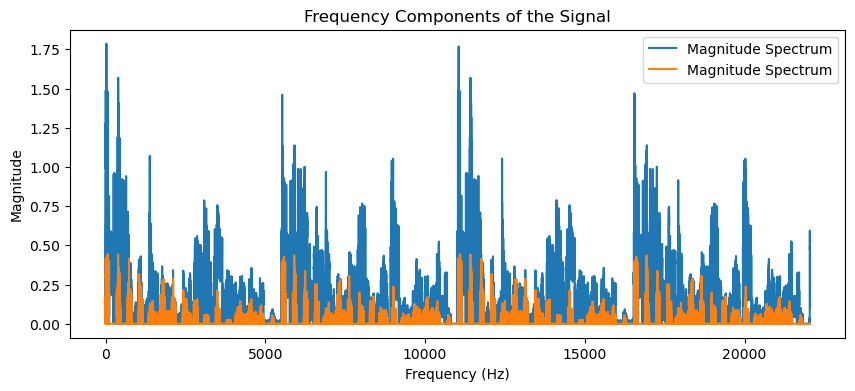

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_spectrum[:len(freqs)//2]), label="Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Components of the Signal")
plt.legend()
plt.show()

# Frequency Filtering : Removing High Frequencies

In [8]:
cutoff = 1000  # Hz

In [9]:
filtered_spectrum = fft_spectrum.copy()
filtered_spectrum[np.abs(freqs) > cutoff] = 0

In [10]:
filtered_audio = np.fft.ifft(filtered_spectrum).real

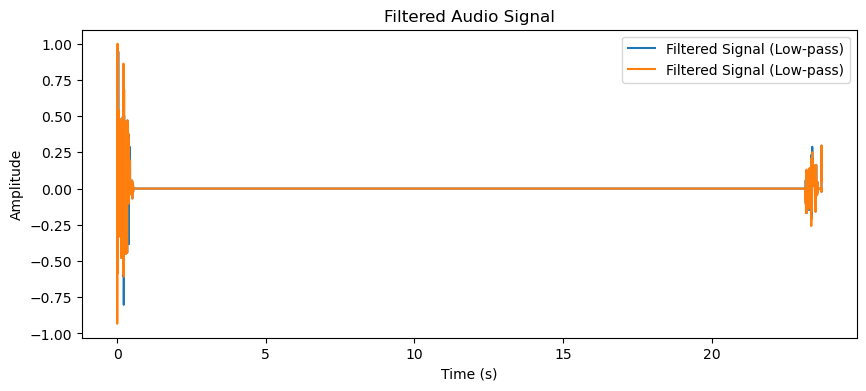

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_audio, label="Filtered Signal (Low-pass)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered Audio Signal")
plt.legend()
plt.show()

# Band-Pass Filtering 

In [12]:
low_cutoff, high_cutoff = 500, 2000  # Hz

In [13]:
emphasized_spectrum = np.zeros_like(fft_spectrum)
emphasized_spectrum[(np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)] = fft_spectrum[(np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)]

In [14]:
emphasized_audio = np.fft.ifft(emphasized_spectrum).real

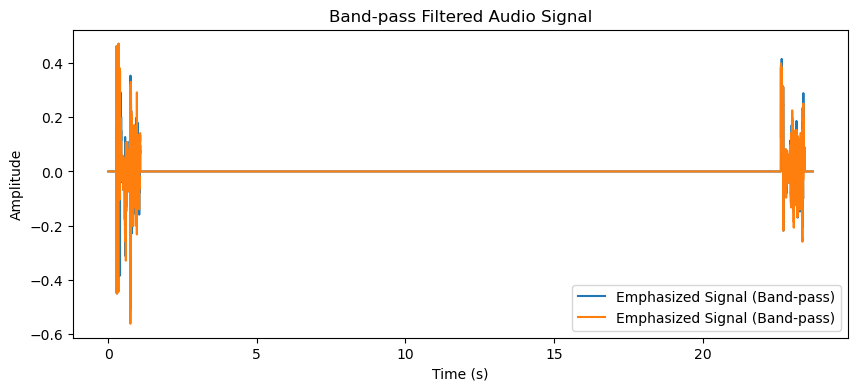

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(time, emphasized_audio, label="Emphasized Signal (Band-pass)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Band-pass Filtered Audio Signal")
plt.legend()
plt.show()

# Visualising Spectrogram

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [17]:
audio_path = "/Users/kajalchuri/Downloads/IndustrialDrumLoop.wav"
audio, sr = librosa.load(audio_path, sr=None)

In [18]:
stft = np.abs(librosa.stft(audio))

In [19]:
db_spectrogram = librosa.amplitude_to_db(stft, ref=np.max)

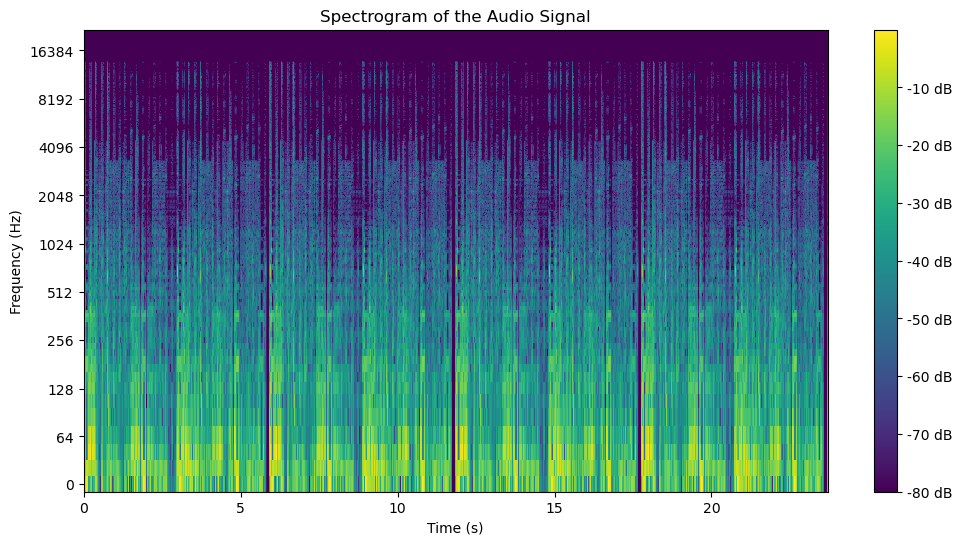

In [20]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(db_spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Signal Reconstruction

In [21]:
fft_spectrum = np.fft.fft(audio)

In [22]:
cutoff_index = int(0.1 * len(fft_spectrum)) 
filtered_spectrum = np.zeros_like(fft_spectrum)
filtered_spectrum[:cutoff_index] = fft_spectrum[:cutoff_index]  
filtered_spectrum[-cutoff_index:] = fft_spectrum[-cutoff_index:] 

In [23]:
reconstructed_filtered_audio = np.fft.ifft(filtered_spectrum).real

/Users/kajalchuri/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


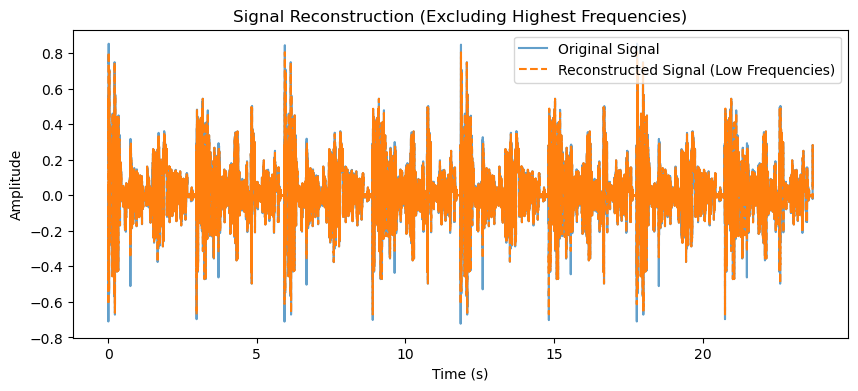

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(time, audio, label="Original Signal", alpha=0.7)
plt.plot(time, reconstructed_filtered_audio, label="Reconstructed Signal (Low Frequencies)", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal Reconstruction (Excluding Highest Frequencies)")
plt.legend()
plt.show()

In [25]:
error = np.abs(audio - reconstructed_filtered_audio)
print(f"Reconstruction Error (Mean Absolute Difference): {np.mean(error)}")

Reconstruction Error (Mean Absolute Difference): 0.0012179572585583795
